# Probability Distributions

In [91]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

rng = np.random.default_rng(42)

#### Mini-Exercise
The average battery life for a fully charges iphone-12 is 14 hours with standard deviation of 1.5 hour

What kind of probability distribution represents the random variable "battery life in hours"?

What are the appropriate defining parameters for this distribution?

Create a Scipy object/instance for this distribution

Use the object create above and choose appropriate method (e.g. pmf, cdf, ppf etc.) to calculate the following:

    a. What is the probability the cell phone battery more than 16 hours.
    b. What is probability that cell phone battery lasts for exactly 12 hours.
    c. What is the probability that cell phone battery lasts for 12 hours or less.
    d. How many hours do the battery lasts for top 25% longest lasting phones.

In [92]:
mu, sigma = 14, 1.5
iphone = stats.norm(14,1.5)
iphone

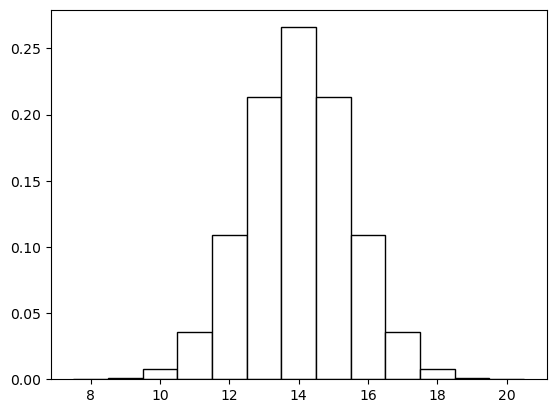

In [93]:
x=range(8,21)
y= iphone.pdf(x)
plt.bar(x,y,edgecolor='black', color='white', width=1)
plt.show()

In [94]:
iphone.sf(16)

0.09121121972586788

In [95]:
iphone.pdf(12)

0.10934004978399577

In [96]:
iphone.cdf(12)

0.09121121972586788

In [97]:
iphone.isf(0.25)

15.011734625294123

#### A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

In [98]:
cars = stats.poisson(2)
cars

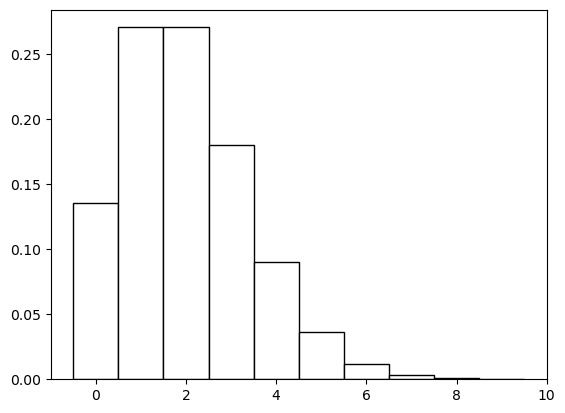

In [99]:
x=range(10)
y= cars.pmf(x)
plt.bar(x,y,edgecolor='black', color='white', width=1)
plt.show()

In [100]:
# What is the probability that no cars drive up in the noon hour?
cars.pmf(0)

0.1353352832366127

In [101]:
# What is the probability that 3 or more cars come through the drive through?
cars.sf(2)

0.32332358381693654

In [102]:
# How likely is it that the drive through gets at least 1 car?
cars.sf(0)

0.8646647167633873

#### Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

In [150]:
mu, sigma = 3.0, 0.3
grades = stats.norm(mu, sigma)
grades

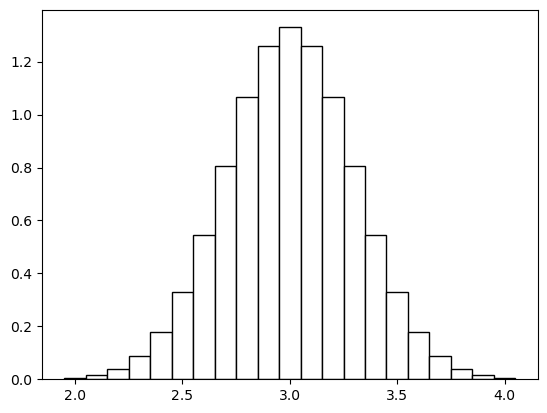

In [161]:
x=np.arange(2,4.1,.1)
y= grades.pdf(x)
plt.bar(x,y,edgecolor='black', color='white', width=.1)
plt.show()

In [164]:
# What grade point average is required to be in the top 5% of the graduating class?
# grades.ppf(.95)
grades.isf(.05)

3.4934560880854417

In [105]:
# What GPA constitutes the bottom 15% of the class?
grades.ppf(.15)

2.689069983151863

In [106]:
# An eccentric alumnus left scholarship money for students in
# the third decile from the bottom of their class. Determine
# the range of the third decile. Would a student with a 2.8
# grade point average qualify for this scholarship?
grades.ppf(.3)
# 2.75 to 2.84 for the third decile

2.842679846187588

In [107]:
grades.ppf(.2)

2.7475136299281258

In [165]:
grades.ppf([.2,.3])

array([2.74751363, 2.84267985])

In [108]:
grades.cdf(2.8)
# 2.8 is in third decile

0.2524925375469227

In [109]:
# If I have a GPA of 3.5, what percentile am I in?
grades.cdf(3.5)

0.9522096477271853

#### A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?


In [110]:
stats.binom(4326,0.02).sf(96)

0.13975823631416448

#### You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.
- What is the probability that at least one of your first 60 answers is correct?


In [167]:
stats.binom(60,1/100).sf(0)

0.45284335760923855

#### The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 


In [112]:
rate = .03
stu = round(.9*3*22)
clean = stats.binom(stu, rate)
clean

In [113]:
sim = 10**5
days = 5
cleans = rng.choice(['c','d'],size=(sim, stu), p=[rate,1-rate])
cleans

array([['d', 'd', 'd', ..., 'd', 'd', 'd'],
       ['d', 'd', 'd', ..., 'd', 'd', 'd'],
       ['d', 'd', 'd', ..., 'd', 'd', 'd'],
       ...,
       ['d', 'd', 'd', ..., 'd', 'd', 'd'],
       ['d', 'd', 'd', ..., 'd', 'd', 'd'],
       ['d', 'd', 'd', ..., 'd', 'd', 'd']], dtype='<U1')

In [169]:
# How likely is it that the break area gets cleaned up each day? 
atl_1_clean = ((cleans=='c').sum(axis=1)>0).mean()
atl_1_clean

0.83513

In [168]:
stu_cl = clean.sf(0)
stu_cl

0.8342199288437352

In [179]:
# How likely is it that it goes two days without getting
# cleaned up?
days = 2
stats.binom(days,1-stu_cl).pmf(days)

0.027483031992576224

In [180]:
stu = round(.9*3*22)*2
dirty = stats.binom(stu, rate)
dirty.pmf(0)

0.027483031992576134

In [181]:
# All week?
days = 5
stats.binom(days,1-stu_cl).pmf(days)

0.00012521651388091348

In [182]:
stu = round(.9*3*22)*5
dirty = stats.binom(stu, rate)
dirty.pmf(0)

0.00012521651388091245

#### You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.


In [194]:
mu, sigma = 15, 3
ppl = 33/2
lunch = stats.norm(mu, sigma)
lunch

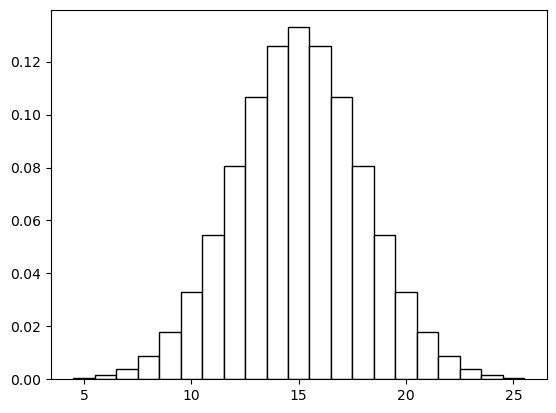

In [195]:
x=range(5,26)
y=lunch.pdf(x)
plt.bar(x,y,edgecolor='black', color='white', width=1)
plt.show()

In [196]:
lunch.cdf(ppl)

0.6914624612740131

In [190]:
mu, sigma = 15*2,3*2
eat = 15
order = 2
cook = 10
lt = 60
wait = (lt-eat-order-cook)
lun = stats.norm(mu, sigma)
lun.cdf(wait)

0.6914624612740131

#### Connect to the `employees` database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [124]:
from env import get_db_url
import pandas as pd

In [125]:
salary = pd.read_sql('select emp_no as emp, salary as sal from salaries where to_date > now()', get_db_url('employees'))
salary

,emp,sal
0,10001,88958
1,10002,72527
2,10003,43311
3,10004,74057
4,10005,94692
...,...,...
240119,499995,52868
240120,499996,69501
240121,499997,83441
240122,499998,55003


In [126]:
mu = round(salary.sal.mean(),2)
sigma = round(salary.sal.std(),2)
sal_per = stats.norm(mu,sigma)
sal_per

In [127]:
# What percent of employees earn less than 60,000?
sal_per.cdf(60000)

0.2438574078313278

In [131]:
(salary.sal<60000).mean()

0.2705727041028802

In [ ]:
# What percent of employees earn more than 95,000?
sal_per.sf(95000)

0.09208829007127312

In [132]:
(salary.sal>95000).mean()

0.1086272092752078

In [ ]:
# What percent of employees earn between 65,000 and 80,000?
sal_per.cdf(80000)-sal_per.cdf(65000)

0.33506048676360467

In [197]:
np.diff(sal_per.cdf([65000,80000]))

array([0.33506049])

In [133]:
(salary.sal<80000).mean()-(salary.sal<65000).mean()

0.32514450867052025

In [198]:
# What do the top 5% of employees make?
# sal_per.ppf(.95)
sal_per.isf(0.05)

100484.65628252999

In [134]:
salary.describe(percentiles=[0.95])

,emp,sal
count,240124.000000,240124.000000
mean,253080.615365,72012.235857
std,161853.087323,17309.995380
min,10001.000000,38623.000000
50%,249792.500000,69805.000000
95%,484919.850000,104225.850000
max,499999.000000,158220.000000
